In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Example:

# Boltzmann constant k_B:
k_B = 1.380649e-23 #m2 kg s-2 K-1

# Header
def pressure(n, T):
  # Body
  """
  Function used to compute the thermal pressure of ideal gases
  Inputs: n (number density), T(temperature)
  Output: prs (pressure)
  Author: W.E.B.B.
  Date: 28/04/23
  """

  # What you compute
  prs = n*k_B*T

  # What you return
  return prs

# Call the function

n = 0.1 #m^{-3}
T = 290 #K

pres = pressure(n, T)

print("The pressure in N/m^2 is:", pres)
     

The pressure in N/m^2 is: 4.0038821000000004e-22


In [7]:
n_vector= np.arange(-3.,5.,0.1) #in log10 scale

t_vector = np.arange(1.,9.,0.1) #in log10 scale


#creating the grid: 

n_2D,T_2D = np.meshgrid(n_vector,t_vector)

print(n_vector.shape)
print(t_vector.shape)
print(n_2D.shape,T_2D.shape)

(80,)
(80,)
(80, 80) (80, 80)


In [8]:
#call the function: 

press_2D = pressure(10**n_2D,10**T_2D)  #we have to convert the vecotrs into lineal

print(press_2D.shape)

(80, 80)


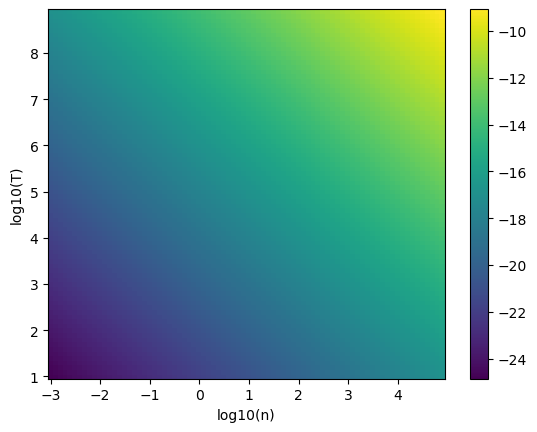

In [14]:
#plotting the solution: 

plt.figure()

plt.pcolor(n_2D,T_2D,np.log10(press_2D))

#add colorbar: 
plt.colorbar()

#Axes labeling:
plt.xlabel("log10(n)")
plt.ylabel("log10(T)")

plt.show()

Text(0.5, 0, 'Z Label')

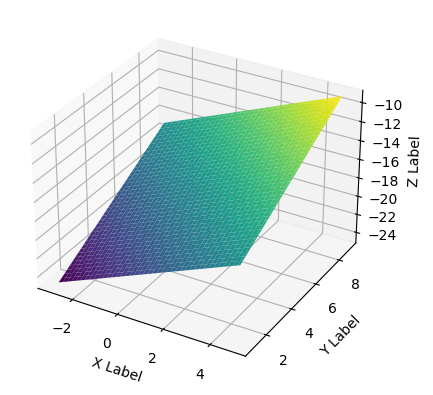

In [28]:
#Pltting in 3D: 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D,T_2D,np.log10(press_2D),cmap= 'viridis')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# MULTIPLE RETURNEED OBJECTS:

In [23]:
#importing scipy to use the correct units: 

import scipy.constants as cte

m = cte.atomic_mass
k_b = cte.k
mu_i = 0.6 

#calculating preassure and density:
def thermal_gas(n, T):
    
    #preassure:
    prs = n*k_b*T
    
    #density:
    dens= mu_i*m*n
    
    # What you return
    return prs,dens

In [24]:
press_2D,dens_2D = thermal_gas(10**n_2D,10**T_2D)  #we have to convert the vecotrs into lineal

print(press_2D.shape,dens_2D.shape)

(80, 80) (80, 80)


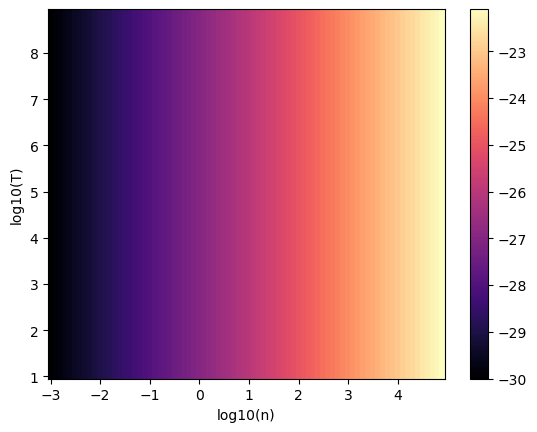

In [33]:
#plotting the solution: 

plt.figure()

plt.pcolor(n_2D,T_2D,np.log10(dens_2D),cmap="magma")

#add colorbar: 
plt.colorbar()

#Axes labeling:
plt.xlabel("log10(n)")
plt.ylabel("log10(T)")

plt.show()

Text(0.5, 0, 'Z Label')

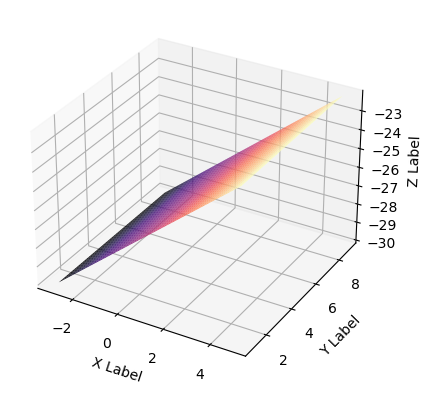

In [32]:
#Pltting in 3D: 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D,T_2D,np.log10(dens_2D),cmap= 'magma')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# NESTED FUNCTIONS:

In [36]:
#norm == distance between two points --> mudule
def norm(p1,p2,p3):
    d_12= np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 + (p1[2]-p2[2])**2)
    d_13= np.sqrt((p1[0]-p3[0])**2 + (p1[1]-p3[1])**2 + (p1[2]-p3[2])**2)
    d_23=np.sqrt((p3[0]-p2[0])**2 + (p3[1]-p2[1])**2 + (p3[2]-p2[2])**2)
    
    return (d_12,d_13,d_23)

In [37]:
part1 = (0.,0.,0.)

part2 = (1.,1.,1.)

part3 = (3.,-3.,3.)

dist_12,dist_13,dist_23 = norm(part1,part2,part3)

In [39]:
print(dist_12,dist_13,dist_23 )

1.7320508075688772 5.196152422706632 4.898979485566356


In [42]:
#know we use a nested function: 
def norm2(p1,p2,p3):
    
    def distance(o1,o2):
        
        "compute distance between two particles"
        met = np.sqrt((o1[0]-o2[0])**2 + (o1[1]-o2[1])**2 + (o1[2]-o2[2])**2)  
        return met
    
    d_12= distance(p1,p2)
    d_13= distance(p1,p3)
    d_23= distance(p2,p3)
    
    return (d_12,d_13,d_23)

In [43]:
part1 = (0.,0.,0.)

part2 = (1.,1.,1.)

part3 = (3.,-3.,3.)

dist_12,dist_13,dist_23 = norm2(part1,part2,part3)

print(dist_12,dist_13,dist_23)

1.7320508075688772 5.196152422706632 4.898979485566356
